### Importing needed libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

### Reading both data-sheets that i found on kaggle

#### link: https://www.kaggle.com/datasets/joebeachcapital/students-performance

In [32]:
performance_data = pd.read_csv('studenr-perfo.csv')
feedback_data = pd.read_csv('teacher-perfo-studentfeed.csv')

### I did a preprocessing step where i added a feedback_state column based on the mean of each line
#### if you can see, each column is containing a scale between 1-10 
#### considering a positive feed back if the mean is superior to 6

In [33]:
columns_for_mean = feedback_data.columns.difference(['Student ID'])

In [46]:
feedback_data['feedback_state'] = feedback_data[columns_for_mean].mean(axis=1).apply(lambda x: 'positive' if x > 6 else 'negative')

In [47]:
feedback_data

,Unnamed: 0,Student ID,Well versed with the subject,Explains concepts in an understandable way,Use of presentations,Degree of difficulty of assignments,Solves doubts willingly,Structuring of the course,Provides support for students going above and beyond,Course recommendation based on relevance,feedback_state
0,0,340,5,2,7,6,9,2,1,8,negative
1,1,253,6,5,8,6,2,1,2,9,negative
2,2,680,7,7,6,5,4,2,3,1,negative
3,3,806,9,6,7,1,5,9,4,6,negative
4,4,632,8,10,8,4,6,6,9,9,positive
...,...,...,...,...,...,...,...,...,...,...,...
996,996,55,8,7,6,2,5,7,7,9,positive
997,997,913,5,5,6,5,6,7,6,1,positive
998,998,199,9,5,8,3,8,1,1,2,positive
999,999,539,10,2,7,4,3,4,10,1,positive


### Here i merged the two data-sheets with the `Student ID` chrol BDD 
#### to see each student their performance and feedbacks

In [48]:
merged_data = pd.merge(performance_data, feedback_data, on='Student ID')

In [49]:
merged_data = pd.DataFrame(merged_data)
merged_data

,Student ID,1,2,3,4,5,6,7,8,9,...,Unnamed: 0,Well versed with the subject,Explains concepts in an understandable way,Use of presentations,Degree of difficulty of assignments,Solves doubts willingly,Structuring of the course,Provides support for students going above and beyond,Course recommendation based on relevance,feedback_state
0,340,2,2,3,3,1,2,2,1,1,...,0,5,2,7,6,9,2,1,8,negative
1,253,2,2,3,3,1,2,2,1,1,...,1,6,5,8,6,2,1,2,9,negative
2,680,2,2,2,3,2,2,2,2,4,...,2,7,7,6,5,4,2,3,1,negative
3,806,1,1,1,3,1,2,1,2,1,...,3,9,6,7,1,5,9,4,6,negative
4,632,2,2,1,3,2,2,1,3,1,...,4,8,10,8,4,6,6,9,9,positive
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
996,55,1,1,1,4,1,1,1,3,2,...,996,8,7,6,2,5,7,7,9,positive
997,913,1,1,2,4,2,2,2,1,4,...,997,5,5,6,5,6,7,6,1,positive
998,199,1,1,2,4,2,1,1,1,4,...,998,9,5,8,3,8,1,1,2,positive
999,539,1,1,2,3,1,1,2,1,1,...,999,10,2,7,4,3,4,10,1,positive


### Now that we've finished our Data preprosessing wela preparation, we can start analyzing

# DATA Analysis

In [50]:
average_performance = merged_data['GRADE'].mean()
print("\nAverage Performance Score: {:.2f}".format(average_performance))


Average Performance Score: 3.24


In [51]:
performance_counts = feedback_data['feedback_state'].value_counts()
print("Teacher Performance Analysis:")
print(performance_counts)

Teacher Performance Analysis:
positive    990
negative     11
Name: feedback_state, dtype: int64


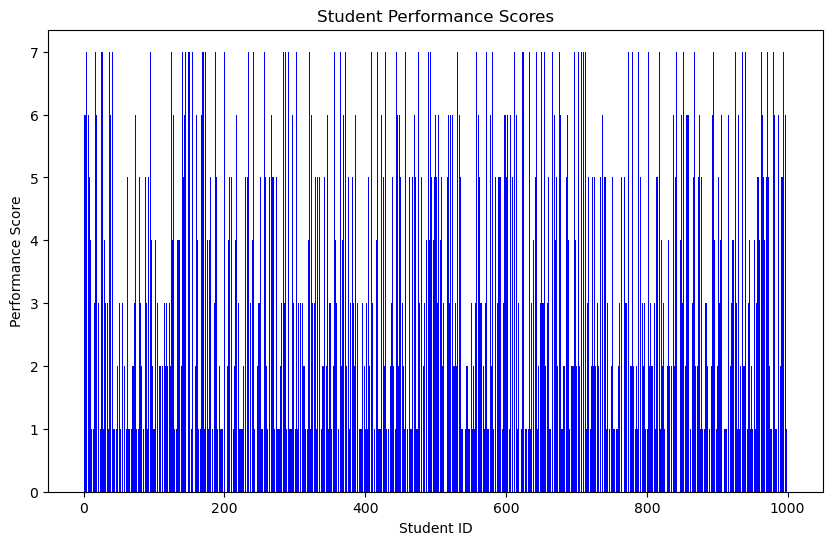

In [52]:
plt.figure(figsize=(10, 6))
plt.bar(merged_data['Student ID'], merged_data['GRADE'], color='blue')
plt.xlabel('Student ID')
plt.ylabel('Performance Score')
plt.title('Student Performance Scores')
plt.show()

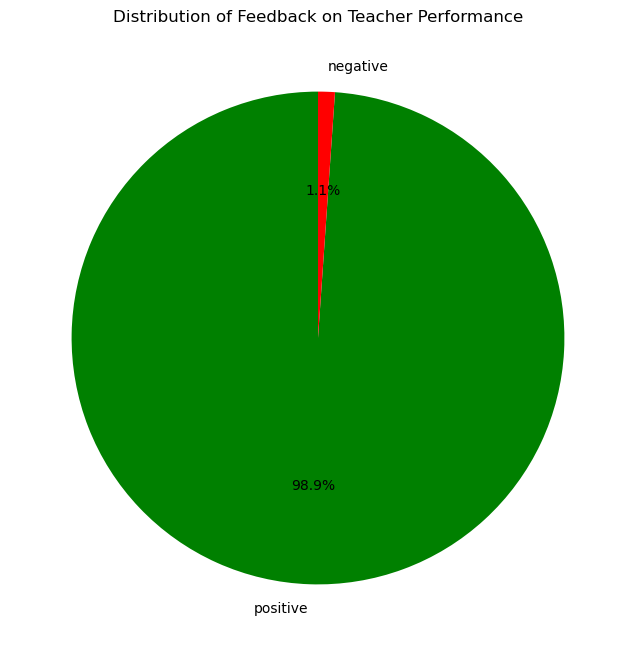

In [53]:
feedback_counts = merged_data['feedback_state'].value_counts()
plt.figure(figsize=(8, 8))
plt.pie(feedback_counts, labels=feedback_counts.index, autopct='%1.1f%%', startangle=90, colors=['green', 'red'])
plt.title('Distribution of Feedback on Teacher Performance')
plt.show()